# Les k premiers éléments (top k)

Rechercher les k premiers éléments est un exercice classique d'algorithmie, souvent appelé *top-k*et qu'on peut résoudre à l'aide d'un [algorithme de sélection](https://fr.wikipedia.org/wiki/Algorithme_de_s%C3%A9lection). C'est très utile en machine learning pour retourner les 3, 4, ou 5 premiers résultats d'un modèle prédictif.

In [1]:
%matplotlib inline

## Enoncé

On part d'une liste toute simple, une permutation aléatoire des premiers entiers. On connaît donc les *k* plus petits éléments qu'il faut obtenir.

In [2]:
import numpy

perm = numpy.random.permutation(numpy.arange(20))
perm

array([10, 13, 17, 14,  7, 15,  0,  3,  9,  6,  8,  2, 19, 18,  4, 12, 11,
        5,  1, 16])

### Exercice 1 : on trie tout et on prend les k plus petit

C'est la méthode la plus simple mais pas la plus efficace.

In [3]:
def topk_sortall(ensemble, k):
    # à vous
    # ...
    pass


topk_sortall(perm, 4)

### Exercice 2 : version plus rapide au choix

A vois de choisir entre l'une et l'autre voire les deux si vous allez vite.

**Idée 1**

On garde un tableau de *k* éléments triés *T*, on parcourt tous les éléments du tableau initial. Si l'élément est plus petit que le plus grand des éléments dans le tableau *T*, on l'ajoute à ce tableau de façon à le garder trier. On continue jusqu'à la fin et le tableau *T* est l'ensemble des *k* plus petits éléments.

**Idée 2**

On découpe le tableau en $\left[\frac{n}{k}\right]$ tableaux de taille *k* qu'on trie. On fusionne ensuite ces $\left[\frac{n}{k}\right]$ pour garder ensuite les *k* plus petits éléments.

In [4]:
def topk_idee1ou2(ensemble, k):
    pass

Vous avez aussi le droit de tricher pour une troisième idée [Heap / Tas](https://sdpython.github.io/doc/teachpyx/dev/practice/py-base/nbheap.html) mais il faudra vous débrouiller tout seul.

### Exercice 3 : algorithme de sélection

L'idée est assez simple : on prend un élément du tableau au hasard - le pivot - , on range à droite tous les éléments supérieurs, à gauche tous les éléments inférieurs. Si ce pivot se trouve à la position *k* alors on a trouvé les *k* plus petits éléments. Sinon, on sait où chercher.

### Exercice 4 : utiliser la fonction perf_counter pour comparer les vitessses de chaque solution

Et bien sûr, il faudra expliquer pourquoi l'algorithme le plus rapide est bien le plus rapide. Faire varier la taille du tableau initial.

In [5]:
from time import perf_counter

## Réponses

### Exercice 1 : on trie tout et on prend les k plus petit

Très simple mais le coût est en $O(n \ln n)$ puisqu'il faut trier tous les éléments.

In [6]:
def topk_sortall(ensemble, k):
    ensemble = ensemble.copy()
    ensemble.sort()
    return ensemble[:k]


topk_sortall(perm, 4)

array([0, 1, 2, 3])

Or trier tous les éléments n'est pas nécessaire. On n'a pas besoin de trier tous les éléments après la position *k*. Il est donc a priori envisageable de fairre mieux en ne faisant que les calculs nécessaires.

### Exercice 2 : version plus rapide au choix

La première idée n'est pas une de celles proposées mais elle est très simple. Parmi les tris décrits sur cette [interstices/tri](https://interstices.info/les-algorithmes-de-tri/), le tri par sélection est intéressant car il suffit d'effectuer les *k* premières itérations pour retrouver les *k* plus petits éléments aux *k* premières positions.

In [7]:
def topk_tri_selection(ensemble, k):
    ensemble = ensemble.copy()
    for i in range(0, min(k, len(ensemble))):
        for j in range(i + 1, len(ensemble)):
            if ensemble[i] > ensemble[j]:
                ensemble[i], ensemble[j] = ensemble[j], ensemble[i]
    return ensemble[:k]


topk_tri_selection(perm, 4)

array([0, 1, 2, 3])

Le coût de l'algorithme est en $O(kn)$.

**idée 1**

In [8]:
def topk_insertion(ensemble, k):
    def position(sub, value):
        a, b = 0, len(sub) - 1
        m = (a + b) // 2
        while a < b:
            if value == sub[m]:
                return m
            if value < sub[m]:
                b = m - 1
            else:
                a = m + 1
            m = (a + b) // 2
        return m if sub[m] >= value else m + 1

    res = [ensemble[0]]
    for i in range(1, len(ensemble)):
        if ensemble[i] < res[-1]:
            # on insère selon un méthode dichotomique
            p = position(res, ensemble[i])
            res.insert(p, ensemble[i])
            if len(res) > k:
                res.pop()

    return res


topk_insertion(perm, 4)

[7, 0, 1, 2]

Le coût de l'algorithme est dans le pire des cas $O(n * (\ln k + k))$ :

* *n* car il y *n* itérations
* $\ln k$ car on recherche un élément de façon dichotomique dans un tableau trié
* *k* car on insère un élément dans un tableau en déplaçant tous les éléments plus grands

Dans les faits, c'est un peu plus compliqué car le fait qu'on ait trouvé un élément plus petit à la position $i$ que le plus grand déjà trouvé n'est pas un événement fréquent si on suppose que le tableau est dans un ordre aléatoire. On pourrait même dire que la probabilité de trouver un élément faisant partie des *k* plus petits éléments est de plus en plus faible. On pourrait soit en rester là, soit se dire qu'on souhaite un algorithme plus rapide encore même dans le pire des cas qui serait pour cette version-ci un tableau trié dans le sens décroissant. Dans ce cas, on sait que le prochain élément fait toujours partie des $k$ plus petits éléments connus jusqu'à présent.

On pourrait répondre à cette question si on suppose que les éléments sont indépendants et tirés selon la même loi aléatoire.

**idée 2**

L'idée est un peu plus compliquée.

In [9]:
def topk_fusion(ensemble, k):
    n = len(ensemble) // (len(ensemble) // k)
    res = []
    last = 0
    while last < len(ensemble):
        res.append(last)
        last += n
    res.append(len(ensemble))

    subs = []
    for i in range(1, len(res)):
        sub = ensemble[res[i - 1] : res[i]]
        sub.sort()
        subs.append(sub)

    indices = [0 for sub in subs]
    topk = []
    while len(topk) < k:
        arg = None
        for i, sub in enumerate(subs):
            if indices[i] < len(sub) and (
                arg is None or sub[indices[i]] < subs[arg][indices[arg]]
            ):
                arg = i
        topk.append(subs[arg][indices[arg]])
        indices[arg] += 1

    return topk


topk_fusion(perm, 4)

[0, 1, 2, 3]

### Exercice 3 : algorithme de sélection

Première version par récurrence.

In [10]:
def topk_select_recursive(ensemble, k):
    if len(ensemble) <= k:
        return ensemble
    p = ensemble[k]
    inf, sup = [], []
    for e in ensemble:
        if e > p:
            sup.append(e)
        else:
            inf.append(e)
    if len(inf) == k:
        return inf
    if len(sup) == 0:
        # potentiellement une boucle infinie, on change
        # le pivot de côté
        sup.append(p)
        del inf[inf.index(p)]
    if len(inf) >= k:
        return topk_select_recursive(inf, k)
    return inf + topk_select_recursive(sup, k - len(inf))


topk_select_recursive(perm, 4)

[0, 3, 2, 1]

Une seconde version sans récurrence.

In [11]:
def topk_select(ensemble, k):
    ensemble = ensemble.copy()

    def loop(a, b, pivot):
        pivot_index = None
        while a < b:
            while a < len(ensemble) and ensemble[a] < pivot:
                a += 1
            while b >= 0 and ensemble[b] >= pivot:
                if ensemble[b] == pivot:
                    pivot_index = b
                b -= 1
            if a < b:
                ensemble[a], ensemble[b] = ensemble[b], ensemble[a]
        return min(a, len(ensemble) - 1), pivot_index

    a = 0
    b = len(ensemble) - 1
    m = k
    while True:
        pivot = ensemble[m]
        m, pi = loop(a, b, pivot)
        if m == k:
            return ensemble[:m]
        # Les cas particuliers interviennent lorsque pivot choisi est
        # identique au précédent.
        if m > k:
            if b == m - 1:
                ensemble[b], ensemble[pi] = ensemble[pi], ensemble[b]
                b -= 1
            else:
                b = m - 1
        else:
            if a == m:
                ensemble[a], ensemble[pi] = ensemble[pi], ensemble[a]
                a += 1
            else:
                a = m
        m = k


topk_select(perm, 4)

array([0, 1, 2, 3])

### Exercice 4 : utiliser la fonction perf_counter pour comparer les vitessses de chaque solution

In [12]:
from time import perf_counter


def measure_time(fct, perm, k, repeat=1000):
    t1 = perf_counter()
    for r in range(repeat):
        fct(perm, k)
    return perf_counter() - t1


measure_time(topk_sortall, perm, 4)

0.0023090000031515956

In [13]:
measure_time(topk_tri_selection, perm, 4)

0.06701939999766182

In [14]:
measure_time(topk_insertion, perm, 4)

0.017117299998062663

In [15]:
measure_time(topk_fusion, perm, 4)

0.0257670000064536

In [16]:
measure_time(topk_select_recursive, perm, 4)

0.010535299996263348

In [17]:
measure_time(topk_select, perm, 4)

0.05852940000477247

La première fonction est plus rapide surtout parce que le tri est implémenté par une fonction du langage particulièrement optimisée (en C). Il faudrait implémenter un tri en python pour pouvoir comparer.

In [18]:
perm10000 = numpy.random.permutation(numpy.arange(10000))

In [19]:
measure_time(topk_sortall, perm10000, 40, repeat=10)

0.006514400003652554

In [20]:
measure_time(topk_tri_selection, perm10000, 40, repeat=10)

1.0134890000044834

In [21]:
measure_time(topk_insertion, perm10000, 40, repeat=10)

0.019539000000804663

In [22]:
measure_time(topk_fusion, perm10000, 40, repeat=10)

0.041308899999421556

In [23]:
measure_time(topk_select_recursive, perm10000, 40, repeat=10)

0.014250300002458971

In [24]:
measure_time(topk_select, perm10000, 40, repeat=10)

0.062273499999719206

Il faut faire tourner la fonction un grand nombre de fois sur différentes tailles de *n* pour voir l'évolution.

In [25]:
from tqdm import tqdm
from pandas import DataFrame

perm1000 = numpy.random.permutation(numpy.arange(1000))
res = []
for k in tqdm(range(100, 501, 50)):
    obs = dict(k=k, n=perm1000.shape[0])
    for fct in [
        topk_sortall,
        topk_tri_selection,
        topk_insertion,
        topk_fusion,
        topk_select_recursive,
        topk_select,
    ]:
        obs[fct.__name__] = measure_time(fct, perm1000, k, repeat=10)
    res.append(obs)

df = DataFrame(res)
df.head()

100%|██████████| 9/9 [00:05<00:00,  1.71it/s]


,k,n,topk_sortall,topk_tri_selection,topk_insertion,topk_fusion,topk_select_recursive,topk_select
0,100,1000,0.000692,0.194126,0.003134,0.003230,0.013448,0.015127
1,150,1000,0.000383,0.283472,0.001300,0.003163,0.022354,0.010969
2,200,1000,0.000835,0.377026,0.001189,0.003169,0.022742,0.024926
3,250,1000,0.000522,0.450699,0.001051,0.002952,0.045683,0.038119
4,300,1000,0.000527,0.539852,0.001091,0.003602,0.038593,0.026605


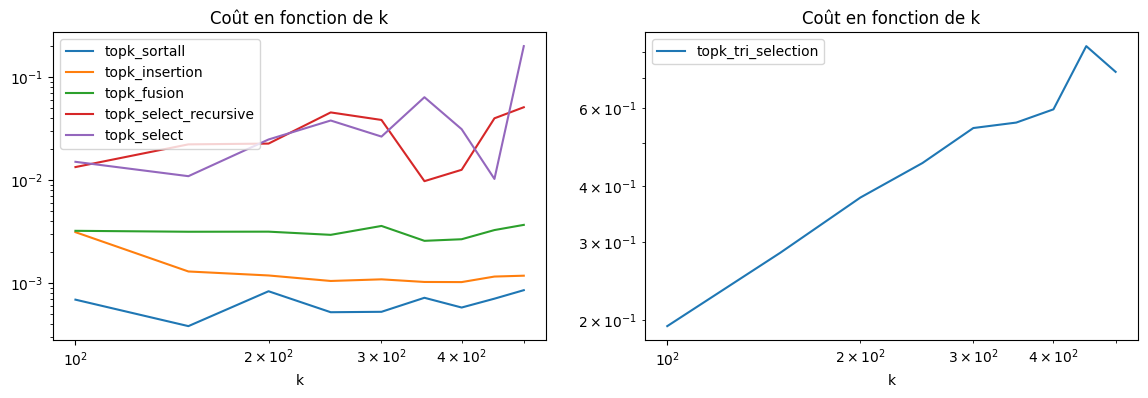

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df.set_index("k").drop(["n", "topk_tri_selection"], axis=1).plot(
    logy=True, logx=True, title="Coût en fonction de k", ax=ax[0]
)
df.set_index("k")[["topk_tri_selection"]].plot(
    logy=True, logx=True, title="Coût en fonction de k", ax=ax[1]
);

Pas évident, le langage est trop haut niveau et le coût de l'interpréteur gomme les aspects algorithmique. Il faudrait augmenter la taille du tableau à trier ou affiner la mesure.

In [27]:
res = []
k = 10
for n in tqdm([20, 100, 1000, 10000, 100000]):
    permn = numpy.random.permutation(numpy.arange(n))
    obs = dict(k=k, n=permn.shape[0])
    for fct in [
        topk_sortall,
        topk_tri_selection,
        topk_insertion,
        topk_fusion,
        topk_select_recursive,
        topk_select,
    ]:
        obs[fct.__name__] = measure_time(fct, permn, k, repeat=10)
    res.append(obs)

df = DataFrame(res)
df.head()

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


,k,n,topk_sortall,topk_tri_selection,topk_insertion,topk_fusion,topk_select_recursive,topk_select
0,10,20,0.000527,0.000620,0.000124,0.000111,0.000137,0.000411
1,10,100,0.000030,0.002329,0.000275,0.000402,0.000326,0.001340
2,10,1000,0.000328,0.021377,0.001635,0.005340,0.001277,0.005500
3,10,10000,0.005612,0.178028,0.011507,0.034768,0.008894,0.022889
4,10,100000,0.066547,1.755049,0.115708,0.361258,0.099447,0.233724


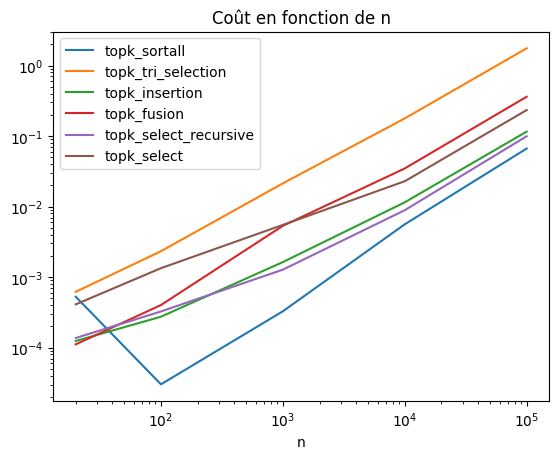

In [28]:
df.set_index("n").drop(["k"], axis=1).plot(
    logy=True, logx=True, title="Coût en fonction de n"
);

Les coûts paraissent linéaires en *n*. Il faudrait cependant augmenter la taille encore car on sait que l'un d'entre eux ne l'est pas. Le coût de l'interpréteur python est là-encore non négligeable. Il faudrait prendre des langages plus rapide ou plus bas niveau ou augmenter les tailles pour voir quelque chose d'intéressant.